# Jessica Barón Martínez Código: 200924758
# Silverio Carmona Código: 200924758

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.



1. Load the dataset using `from sklearn.datasets import load_boston`.
2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 
4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.
5. Use the function `.describe()` from Pandas for obtaining statistics about each column.

## 1. Load the dataset using from sklearn.datasets import load_boston.

In [194]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [45]:
dfboston = load_boston()

In [46]:
print(dfboston.data.shape)
print(dfboston.keys())
print(dfboston.DESCR)

(506, 13)
dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate

In [47]:
print(dfboston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## 2. Create a DataFrame using the attribute .data from the loading function of Scikit-learn.


In [48]:
data = pd.DataFrame(dfboston.data)
print(data.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


## 3. Assign the columns of the DataFrame so they match the .feature_names attribute from the loading function of Scikit-learn.

In [49]:
data.columns = dfboston.feature_names
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


## 4. Assign a new column to the DataFrame which holds the value to predict, that means, the .target attribute of the loading function of Scikit-learn. The name of this columns must be MEDV.

In [213]:
data['MEDV'] = dfboston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [214]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB
None


## 5. Use the function .describe() from Pandas for obtaining statistics about each column.

In [215]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 4.3 Feature analysis:

## Filter the dataset to just these features:
#Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
#Dependent: 'MEDV'

In [216]:
data[['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE']].head()

,LSTAT,INDUS,NOX,RM,AGE
0,4.98,2.31,0.538,6.575,65.2
1,9.14,7.07,0.469,6.421,78.9
2,4.03,7.07,0.469,7.185,61.1
3,2.94,2.18,0.458,6.998,45.8
4,5.33,2.18,0.458,7.147,54.2


In [217]:
data[['MEDV']].head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [218]:
data[['MEDV']].head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Generate a scatter matrix among the features mentioned above using Pandas (scatter_matrix) or Seaborn (pairplot).
Do you find any relationship between the features?

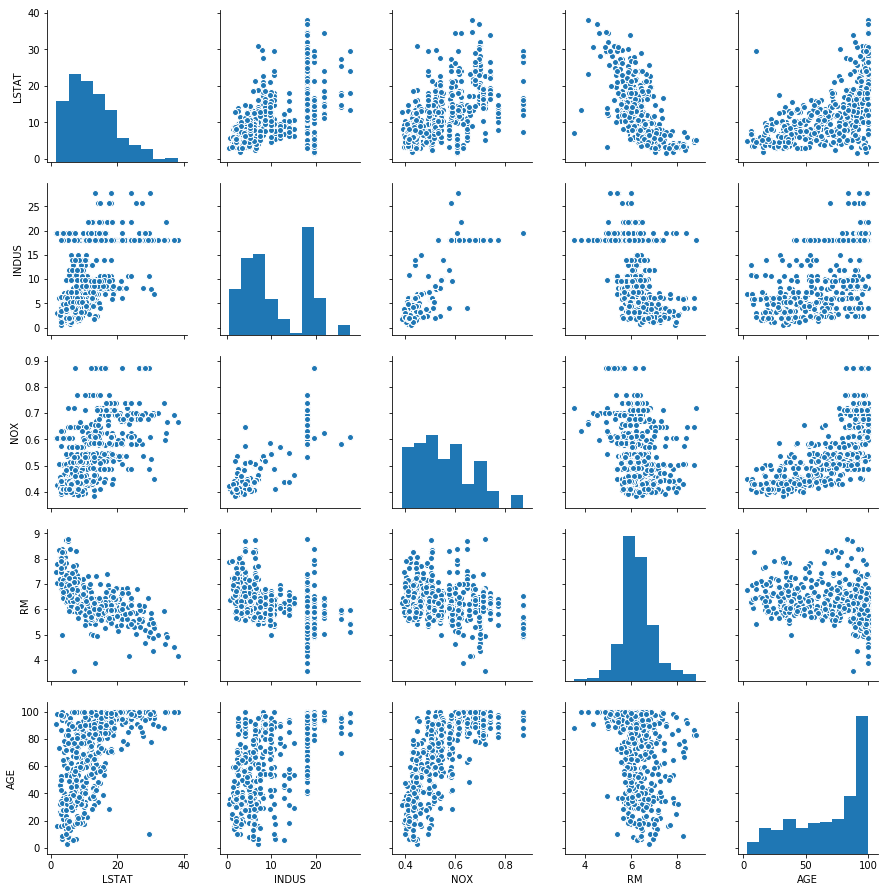

In [219]:
sns.pairplot(data, vars=["LSTAT", "INDUS", "NOX", "RM", "AGE"])
plt.show()

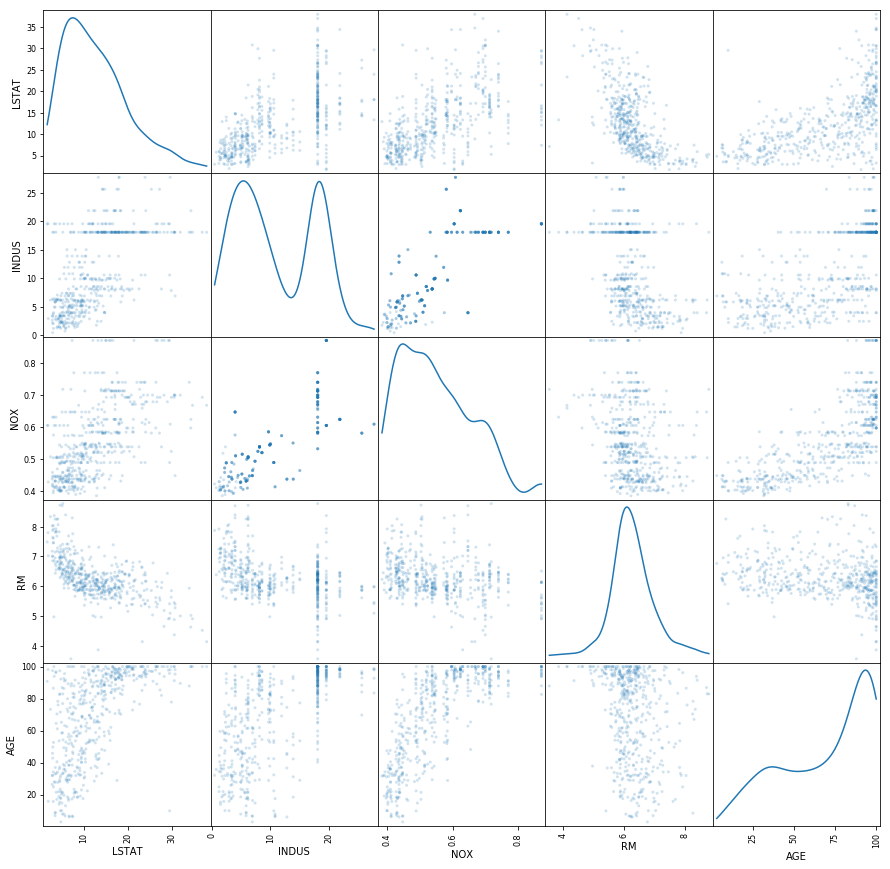

In [220]:
scatter_matrix(data[['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE']], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

## Generate the correlation matrix between these variables using numpy.corrcoef. Also include MEDV.
Which characteristics are more correlated?
BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

In [381]:
#Usando corrcoef
print(np.corrcoef(data[['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE','MEDV']],rowvar=False))

[[ 1.          0.60379972  0.59087892 -0.61380827  0.60233853 -0.73766273]
 [ 0.60379972  1.          0.76365145 -0.39167585  0.64477851 -0.48372516]
 [ 0.59087892  0.76365145  1.         -0.30218819  0.7314701  -0.42732077]
 [-0.61380827 -0.39167585 -0.30218819  1.         -0.24026493  0.69535995]
 [ 0.60233853  0.64477851  0.7314701  -0.24026493  1.         -0.37695457]
 [-0.73766273 -0.48372516 -0.42732077  0.69535995 -0.37695457  1.        ]]


In [383]:
#usando corr estandar
corr = data[['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE','MEDV']].corr()
corr

,LSTAT,INDUS,NOX,RM,AGE,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,0.602339,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,0.644779,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,0.731470,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,-0.240265,0.695360
AGE,0.602339,0.644779,0.731470,-0.240265,1.000000,-0.376955
MEDV,-0.737663,-0.483725,-0.427321,0.695360,-0.376955,1.000000


* Se observa una relación positiva alta (76%) entre INDUS y NOX lo cual es lógico por la contaminación que genera la industria ya que el óxido nítrico tiende a subir con el incremento de la industria.
* De la misma manera hay una alta relación (73%) entre edad y concentración de óxido nitrico y una relation fuerte negativa entre el valor de la vivienda y el porcentaje de población de status bajo

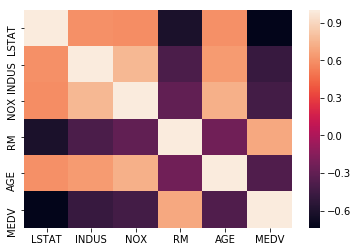

In [384]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$
* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $
* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data
* How does the model perform on $ D_1 $ and $ D_2 $? Why?



### Modelación lineal con el subset D1
* $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$

In [385]:
X = data['RM']
y = data['MEDV']
print(X.head())
print(y.head())

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


* Train a linear regression model
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data

In [386]:
# For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $
X_train_D1, X_test_D1, y_train_D1, y_test_D1 = train_test_split(X, y, random_state=5, test_size=0.3)

In [387]:
# Training the model
linreg = LinearRegression()
linreg.fit(X_train_D1.values.reshape(-1,1), y_train_D1.values.reshape(-1,1))
Y_pred = linreg.predict(X_test_D1.values.reshape(-1,1))

# Mean Square Error
mse = metrics.mean_squared_error(y_test_D1, Y_pred)
print('MSE:', mse)

MSE: 46.68491330777206


In [388]:
# Intecrcept and coefficients
w = linreg.intercept_
w0 = linreg.coef_
print('Valor de w: ', w)
print('Valor de w0: ', w0)

Valor de w:  [-33.03375482]
Valor de w0:  [[8.82822236]]


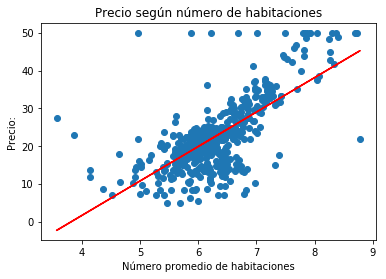

In [389]:
# Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data
# para poder dibujar la linea debemos calcular la pendiente y en conjunto con el intercepto podemos generarla  

slope, intercept = np.polyfit(data['RM'], y, 1)

x = data['RM']
abline_values = [slope * i + intercept for i in x]

#En primer lugar dibujamos los valores con los datos de train y test
#plt.scatter(X_test_D1, y_test_D1)
plt.scatter(x, y)
plt.xlabel("Número promedio de habitaciones")
plt.ylabel("Precio:")
plt.title("Precio según número de habitaciones")
#Agregamos la linea
plt.plot(x, abline_values, 'r')
plt.show()

### Modelación lineal con el subset D2
* $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$

In [390]:
X = data['LSTAT']
y = data['MEDV']
print(X.head())
print(y.head())

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [391]:
# For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $
X_train_D2, X_test_D2, y_train_D2, y_test_D2 = train_test_split(X, y, random_state=5, test_size=0.3)

In [392]:
# Training the model
linreg = LinearRegression()
linreg.fit(X_train_D2.values.reshape(-1,1), y_train_D2.values.reshape(-1,1))
Y_pred = linreg.predict(X_test_D2.values.reshape(-1,1))

# Mean Square Error
mse = metrics.mean_squared_error(y_test_D2, Y_pred)
print('MSE:', mse)

MSE: 45.930905249143315


In [393]:
# Intecrcept and coefficients
w = linreg.intercept_
w0 = linreg.coef_
print('Valor de w: ', w)
print('Valor de w0: ', w0)

Valor de w:  [34.29237313]
Valor de w0:  [[-0.93779699]]


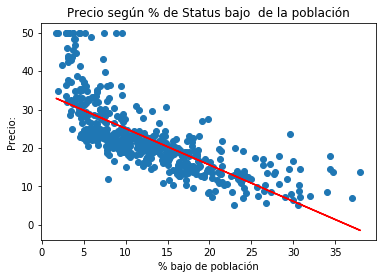

In [394]:
# Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data
# para poder dibujar la linea debemos calcular la pendiente y en conjunto con el intercepto podemos generarla  

slope, intercept = np.polyfit(data['LSTAT'], y, 1)

x = data['LSTAT']
abline_values = [slope * i + intercept for i in x]

#En primer lugar dibujamos los valores con los datos de train y test
plt.scatter(x, y)
plt.xlabel("% bajo de población")
plt.ylabel("Precio:")
plt.title("Precio según % de Status bajo  de la población")
#Agregamos la linea
plt.plot(x, abline_values, 'r')
plt.show()

* Los  modelos tanto $D1$ y $D2$ muestran un comporamiento similar con un MSE de 46.7 y 45.9 respectivamente. En el modelo $D1$ observando la correlación de las variables, hay una relación positiva entre la cantidad de habitaciones y el precio de la vivienda, y en el $D2$ una fuerte relación negativa con el precio. Sin embargo, su nivel de precisión es muy bajo tomando cada variable por separado. 

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set
* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

In [404]:
# Partición del dataset en predictores y variable de respuesta
X = data.drop('MEDV', axis = 1)
y = data['MEDV']

In [405]:
# Generate a 70-30 partitioning of the data using all the features. (Do not include the dependent variable MEDV)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [406]:
# Train a linear regression model with the objective of predicting the output variable MEDV.
# Report the mean square error on the test set
lr = LinearRegression()
lr.fit(X_train, y_train)
Y_pred = lr.predict(X_test)
# Mean Square Error
mse = metrics.mean_squared_error(y_test, Y_pred)
print('MSE:', mse)

MSE: 30.70323220721902


In [407]:
# Train a regression model using MLPRegressor in order to predict the output variable MEDV.
# Report the mean square error on the test set
mlp = MLPRegressor(hidden_layer_sizes=(2),solver='sgd', max_iter=100, activation='relu', random_state=1, 
                   learning_rate_init=0.01, batch_size="auto", momentum=0.9)

In [408]:
mlp.fit(X_train, y_train)
pred = mlp.predict(X_test)
# Mean Square Error
msemlp = metrics.mean_squared_error(pred, y_test)
print ('MSE test:', msemlp)
#mse = metrics.mean_squared_error(y_test, Y_pred)
#print('MSE:', mse)

MSE test: 102.01733264289925


In [409]:
# Scale the data so that they have zero mean variance one per feature (only  X ).
sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)

In [410]:
# Train a linear regression model using the scaled data.
# Report the mean square error on the test set
lrsc = LinearRegression()
lrsc.fit(X_train_s, y_train)
Y_predsc = lrsc.predict(X_test_s)
# Mean Square Error
msesc = metrics.mean_squared_error(y_test, Y_predsc)
print('MSE:', msesc)

MSE: 30.703232207218907


In [411]:
#Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the scaled data.
# Report the mean square error on the test set

mlp2 = MLPRegressor(hidden_layer_sizes=(128,512),solver='sgd', max_iter=100, activation='relu', random_state=1, 
                   learning_rate_init=0.01, batch_size="auto", momentum=0.9)

In [412]:
mlp2.fit(X_train_s, y_train)
predsc = mlp2.predict(X_test_s)
# Mean Square Error
msemlpsc = metrics.mean_squared_error(predsc, y_test)
print ('MSE train:', msemlpsc)
#mse = metrics.mean_squared_error(y_test, Y_pred)
#print('MSE:', mse)

MSE train: 5.162697395776383e+51


* Analizando los modelos generados en los puntos anteriores se observa que el modelo Multilayer Perceptron con dos niveles tiene un mejor desempeño con un MSE de 5.2% contra el de 30.7% del modelo de regresión lineal.
Esto se debe a que la relación entre las vriables no es lineal y las redes redes neuronales pueden modelar estas no linealidades de manera automática, algo que no se puede hacer con regresión lineal a no ser que usemos transformaciones como los splines. Por otro lado, el hecho de adicionar dos niveles al modelo recuce dramaticamente estas linearidades y hace que el modelo con redes neuronales tenga un mejor comportamiento.